In [62]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [63]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('Data_files/Graph_randstad.xlsx')

# Show contents of the dataframe
randstad_network

,Cities,Population,Employees,Latitude,Longitude,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,Alkmaar,111834,122.202757,52.6316,4.753400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Almere,222825,243.484355,52.3508,5.264700,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Alphen aan de Rijn,114182,124.768454,52.1112,4.647300,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
3,Amersfoort,160759,175.663868,52.1561,5.387800,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Amsterdam,918117,1003.240776,52.3676,4.904100,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
5,Delft,106086,115.921828,52.0116,4.357100,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
6,Den Haag,562839,615.022960,52.0705,4.300700,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
7,Dordrecht,121434,132.692827,51.8133,4.690100,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8,Gouda,75316,82.298969,52.0115,4.710500,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
9,Haarlem,165396,180.730791,52.3874,4.646299,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0


In [64]:
# Make a graph from the dataframe
randstad_network_adjacency = randstad_network.iloc[:, 5:]
Randstad_Graph = nx.from_pandas_adjacency(randstad_network_adjacency)

In [65]:
# Giving the nodes the city names

# Getting the city names from the original dataframe
city_names = []
for city in randstad_network['Cities']:
    city_names.append(city)

# Renaming the nodes in the created graphs
for i in range(len(city_names)):
    nx.relabel_nodes(Randstad_Graph, {i: city_names[i]}, copy=False)

# Also fixing/renaming the original dataframe
for i,name in enumerate(city_names):
    randstad_network.rename(columns={i: name}, inplace=True)

# Checking whether the nodes have the desired names
print(nx.nodes(Randstad_Graph))

['Alkmaar', 'Almere', 'Alphen aan de Rijn', 'Amersfoort', 'Amsterdam', 'Delft', 'Den Haag', 'Dordrecht', 'Gouda', 'Haarlem', 'Hilversum', 'Leiden', 'Rotterdam', 'Schiphol Haarlemmermeer', 'Spijkenisse', 'Utrecht', 'Vlaardingen', 'Westland', 'Woerden', 'Zaanstad', 'Zoetermeer']


In [66]:
# Kept the shortest path in, despite having no length or time yet for each path, so default weight of each edge is 1
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Haarlem', 'Leiden', 'Den Haag', 'Delft']


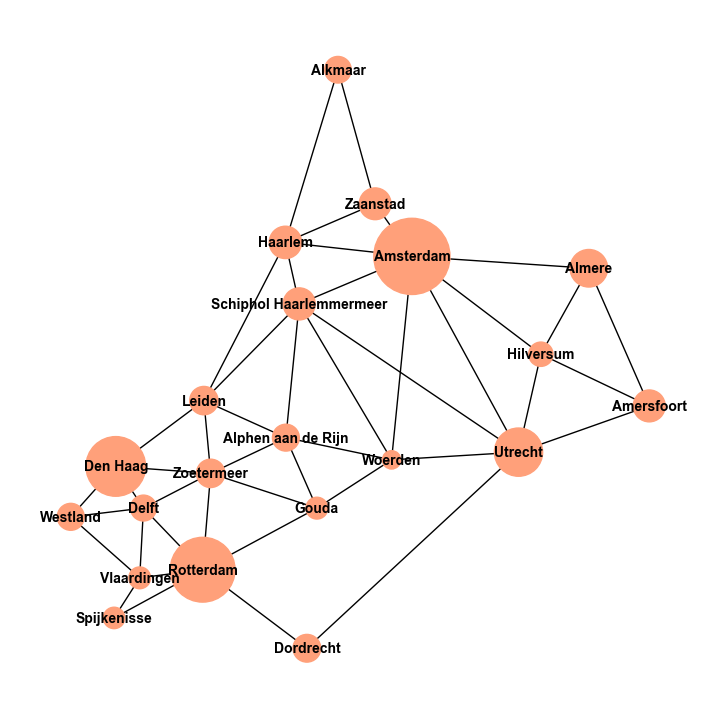

In [67]:
# Plotting the graph

# Gathering attributes for the graph
employees_attributes = []  # For node size drawing, this must be list with data ordered in the order of nodes in the graph
pos_attributes = {}

for city in Randstad_Graph.nodes():
    # The coordinates
    latitude = randstad_network.loc[randstad_network['Cities'] == city, 'Latitude'].iloc[0]
    longitude = randstad_network.loc[randstad_network['Cities'] == city, 'Longitude'].iloc[0]
    pos_attributes.update({city: (longitude, latitude)})
    
    # The employees
    employees = randstad_network.loc[randstad_network['Cities'] == city, 'Employees'].iloc[0]
    employees_attributes.append(employees)
    
    
# Adjust the figure size as needed
plt.figure(figsize=(7, 7))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[3 * i for i in employees_attributes], 
        node_color='lightsalmon', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
    


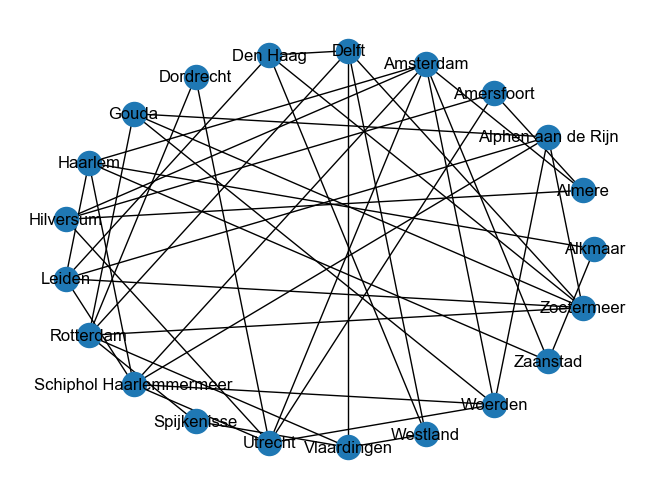

In [68]:
# Plot the graph, using a cicular layout
nx.draw_circular(Randstad_Graph, with_labels=True)

### Do note that none of the connections within our graph have either a Time or Length

Therefore the betweenness calculation might still be useful, but not yet done. We should still implement the next step of giving edges attributes before we fully can complete our first stage of analyses.



In [69]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Alkmaar': 0.0,
 'Almere': 1.2023809523809523,
 'Alphen aan de Rijn': 8.312373737373738,
 'Amersfoort': 1.5075757575757576,
 'Amsterdam': 34.525324675324676,
 'Delft': 8.575,
 'Den Haag': 14.976262626262626,
 'Dordrecht': 19.711616161616163,
 'Gouda': 12.00959595959596,
 'Haarlem': 27.008802308802313,
 'Hilversum': 2.70995670995671,
 'Leiden': 37.48585858585857,
 'Rotterdam': 40.37474747474747,
 'Schiphol Haarlemmermeer': 21.257251082251084,
 'Spijkenisse': 0.0,
 'Utrecht': 36.84018759018759,
 'Vlaardingen': 4.241666666666666,
 'Westland': 1.7777777777777777,
 'Woerden': 16.60050505050505,
 'Zaanstad': 3.095238095238095,
 'Zoetermeer': 23.787878787878785}

C:\Users\TimEW\AppData\Local\Temp\ipykernel_3752\2351530384.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betw.set_xticklabels(G_betw.get_xticklabels(), rotation=90, color='black', ha='center')


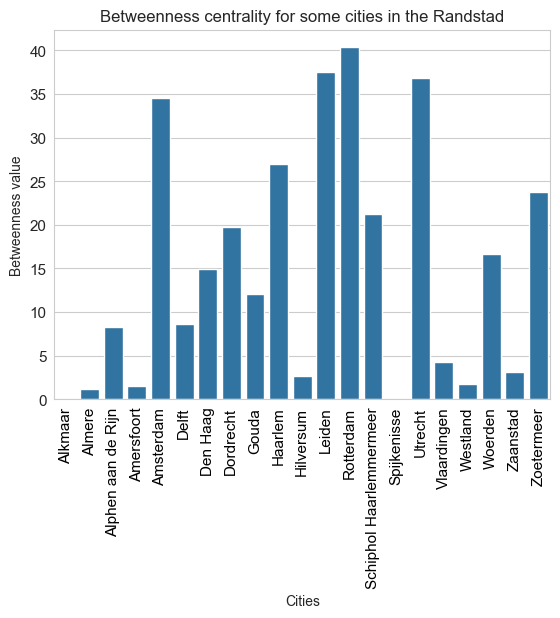

In [70]:
# Plot the values in a bar chart
G_betw = sns.barplot(betweenness)
G_betw.set_title("Betweenness centrality for some cities in the Randstad")
G_betw.set_xticklabels(G_betw.get_xticklabels(), rotation=90, color='black', ha='center')
G_betw.tick_params(direction='out', pad=2, labelsize=11)
G_betw.set(xlabel='Cities', ylabel='Betweenness value')
plt.show()

### Now let's introduce the times of the routes in our graph

The next part of this notebook will include the times of the car routes as attributes in our graph.
This allows us to do more fruitful and fun analyses!
But first we have to load them in from an xlsx sheet and create a dataframe.
Then we modify this dataframe to subtract edge attributes.
Which we then will add in our graph.
Let's go!

In [71]:
# Reading the times from the excel sheet
randstad_car_distance = pd.read_excel('Data_files/Randstad_car_distance.xlsx')
randstad_car_times = pd.read_excel('Data_files/Randstad_car_times.xlsx')

# Clean up the DataFrame, so extraction is easier, here we make the cities columns also the indices
randstad_car_distance.set_index('Cities', inplace=True)
randstad_car_times.set_index('Cities', inplace=True)
randstad_car_times

,Alkmaar,Almere,Alphen aan de Rijn,Amersfoort,Amsterdam,Delft,Den Haag,Dordrecht,Gouda,Haarlem,...,Leiden,Rotterdam,Schiphol Haarlemmermeer,Spijkenisse,Utrecht,Vlaardingen,Westland,Woerden,Zaanstad,Zoetermeer
Cities,,,,,,,,,,,,,,,,,,,,,
Alkmaar,x,x,x,x,x,x,x,x,x,26,...,x,x,x,x,x,x,x,x,24,x
Almere,x,x,x,37,28,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
Alphen aan de Rijn,x,x,x,x,x,x,x,x,24,x,...,19,x,19,x,x,x,x,22,x,22
Amersfoort,x,37,x,x,38,x,x,x,x,x,...,x,x,x,x,23,x,x,x,x,x
Amsterdam,x,28,x,38,x,x,x,x,x,25,...,x,x,21,x,40,x,x,41,16,x
Delft,x,x,x,x,x,x,20,x,x,x,...,x,19,x,x,x,18,19,x,x,21
Den Haag,x,x,x,x,x,20,x,x,x,x,...,23,x,x,x,x,x,18,x,x,18
Dordrecht,x,x,x,x,x,x,x,x,x,x,...,x,27,x,x,44,x,x,x,x,x
Gouda,x,x,x,x,x,x,x,x,x,x,...,x,25,x,x,x,x,x,21,x,20


In [72]:
# This functions allows the adding of edge attributes/weights to the Randstad network, based on a deliverd dataframe with these attributes and a chosen attribute name
def adding_attributes(graph, attribute_dataframe, name_attribute):    
    # Creating a dictionary to store all edges attributes in
    attribute_dictionary = {}
    
    # Use the already existing Randstad graph to look up the existing edges
    for edge in graph.edges():
        source, target = edge
        # Take the distance from the dataframe with all the car travel times
        value_attribute = attribute_dataframe.at[source, target]
        # Update those in one dictionary with edges as key and the distance as value
        attribute_dictionary.update({edge : value_attribute})
    
    
    # Update the Randstad graph with the newly configured car travel times
    nx.set_edge_attributes(graph, attribute_dictionary, name_attribute)
    
    return attribute_dictionary

distance_dictionary = adding_attributes(Randstad_Graph, randstad_car_distance, 'length')
time_dictionary = adding_attributes(Randstad_Graph, randstad_car_times, 'time')
nx.get_edge_attributes(Randstad_Graph, 'time')

{('Alkmaar', 'Haarlem'): 26,
 ('Alkmaar', 'Zaanstad'): 24,
 ('Almere', 'Amersfoort'): 37,
 ('Almere', 'Amsterdam'): 28,
 ('Almere', 'Hilversum'): 26,
 ('Alphen aan de Rijn', 'Gouda'): 24,
 ('Alphen aan de Rijn', 'Leiden'): 19,
 ('Alphen aan de Rijn', 'Schiphol Haarlemmermeer'): 19,
 ('Alphen aan de Rijn', 'Woerden'): 22,
 ('Alphen aan de Rijn', 'Zoetermeer'): 22,
 ('Amersfoort', 'Hilversum'): 23,
 ('Amersfoort', 'Utrecht'): 23,
 ('Amsterdam', 'Haarlem'): 25,
 ('Amsterdam', 'Hilversum'): 29,
 ('Amsterdam', 'Schiphol Haarlemmermeer'): 21,
 ('Amsterdam', 'Utrecht'): 40,
 ('Amsterdam', 'Woerden'): 41,
 ('Amsterdam', 'Zaanstad'): 16,
 ('Delft', 'Den Haag'): 20,
 ('Delft', 'Rotterdam'): 19,
 ('Delft', 'Vlaardingen'): 18,
 ('Delft', 'Westland'): 19,
 ('Delft', 'Zoetermeer'): 21,
 ('Den Haag', 'Leiden'): 23,
 ('Den Haag', 'Westland'): 18,
 ('Den Haag', 'Zoetermeer'): 18,
 ('Dordrecht', 'Rotterdam'): 27,
 ('Dordrecht', 'Utrecht'): 44,
 ('Gouda', 'Rotterdam'): 25,
 ('Gouda', 'Woerden'): 21,
 ('G

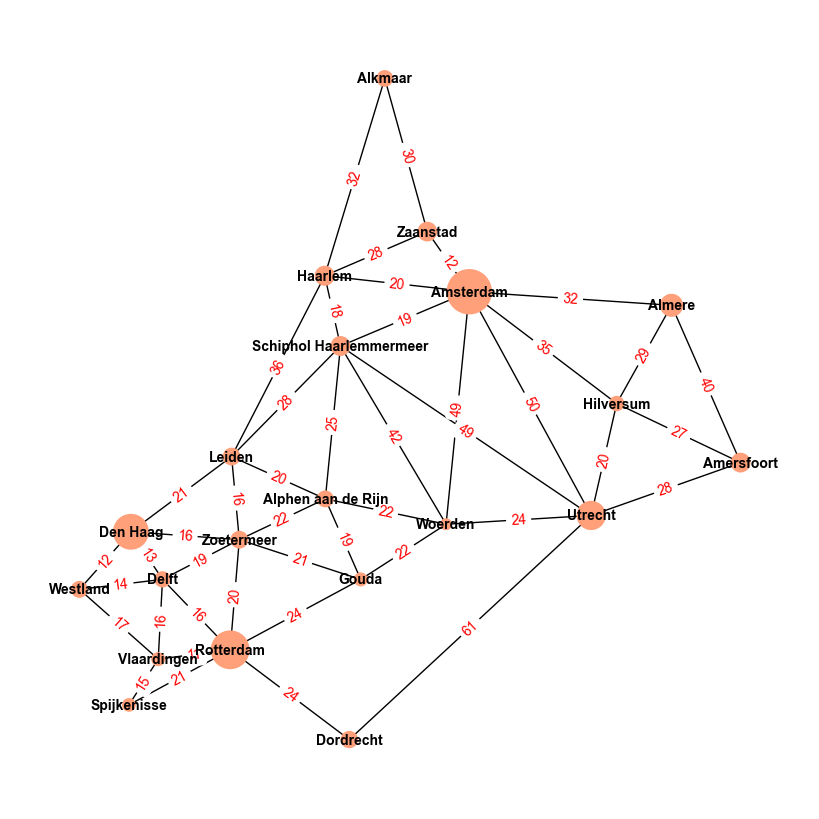

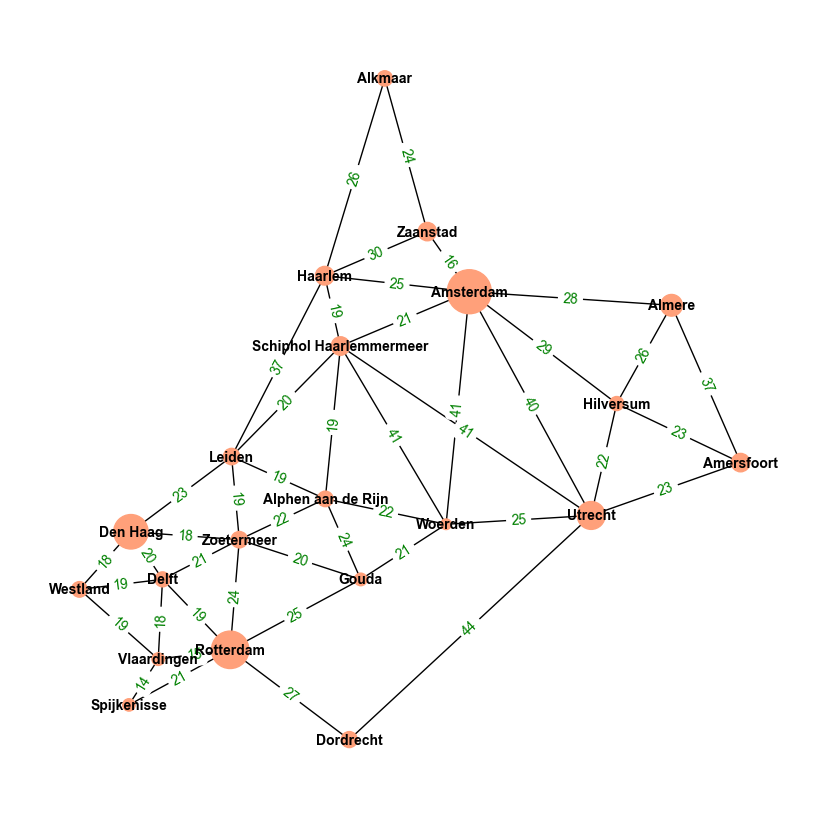

In [73]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color='lightsalmon', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=distance_dictionary,
                             font_color='red'
                             )
plt.axis('off')
plt.show()

# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color='lightsalmon', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=time_dictionary,
                             font_color='green'
                             )
plt.axis('off')
plt.show()

In [76]:
# A function to choose the quickest or shortest (depending on selected weight) path between source and target node, returns dict like object if either source and/or target is None
def shortest_path(graph, source=None, target=None, weight=None):
    short_path = nx.shortest_path(graph, source=source, target=target, weight=weight)
    return short_path

# Testing area to see whether the functions work
path1 = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='length')
print(path1)
print(f'{nx.path_weight(Randstad_Graph, path1, weight='length')} km')
print(f'{nx.path_weight(Randstad_Graph, path1, weight='time')} minutes\n')

# Testing area to see whether the functions work
path2 = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='time')
print(path2)
print(f'{nx.path_weight(Randstad_Graph, path2, weight='length')} km')
print(f'{nx.path_weight(Randstad_Graph, path2, weight='time')} minutes')

['Amsterdam', 'Schiphol Haarlemmermeer', 'Leiden', 'Den Haag', 'Delft']
81 km
84 minutes

['Amsterdam', 'Schiphol Haarlemmermeer', 'Leiden', 'Zoetermeer', 'Delft']
82 km
81 minutes


In [77]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed_distance = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                                    k=None,
                                                                    normalized=True, 
                                                                    weight='length',
                                                                    seed=None)
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed_time = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                                k=None, 
                                                                normalized=True, 
                                                                weight='length', 
                                                                seed=None)
print(edge_betweenness_weigthed_distance)
print(edge_betweenness_weigthed_time)

{('Alkmaar', 'Haarlem'): 0.06190476190476191, ('Alkmaar', 'Zaanstad'): 0.03333333333333334, ('Almere', 'Amersfoort'): 0.004761904761904762, ('Almere', 'Amsterdam'): 0.06904761904761905, ('Almere', 'Hilversum'): 0.02142857142857143, ('Alphen aan de Rijn', 'Gouda'): 0.030952380952380953, ('Alphen aan de Rijn', 'Leiden'): 0.01904761904761905, ('Alphen aan de Rijn', 'Schiphol Haarlemmermeer'): 0.05476190476190477, ('Alphen aan de Rijn', 'Woerden'): 0.03333333333333334, ('Alphen aan de Rijn', 'Zoetermeer'): 0.0380952380952381, ('Amersfoort', 'Hilversum'): 0.02380952380952381, ('Amersfoort', 'Utrecht'): 0.06666666666666668, ('Amsterdam', 'Haarlem'): 0.01904761904761905, ('Amsterdam', 'Hilversum'): 0.05238095238095239, ('Amsterdam', 'Schiphol Haarlemmermeer'): 0.17857142857142858, ('Amsterdam', 'Utrecht'): 0.014285714285714287, ('Amsterdam', 'Woerden'): 0.014285714285714287, ('Amsterdam', 'Zaanstad'): 0.1142857142857143, ('Delft', 'Den Haag'): 0.05238095238095239, ('Delft', 'Rotterdam'): 0.03

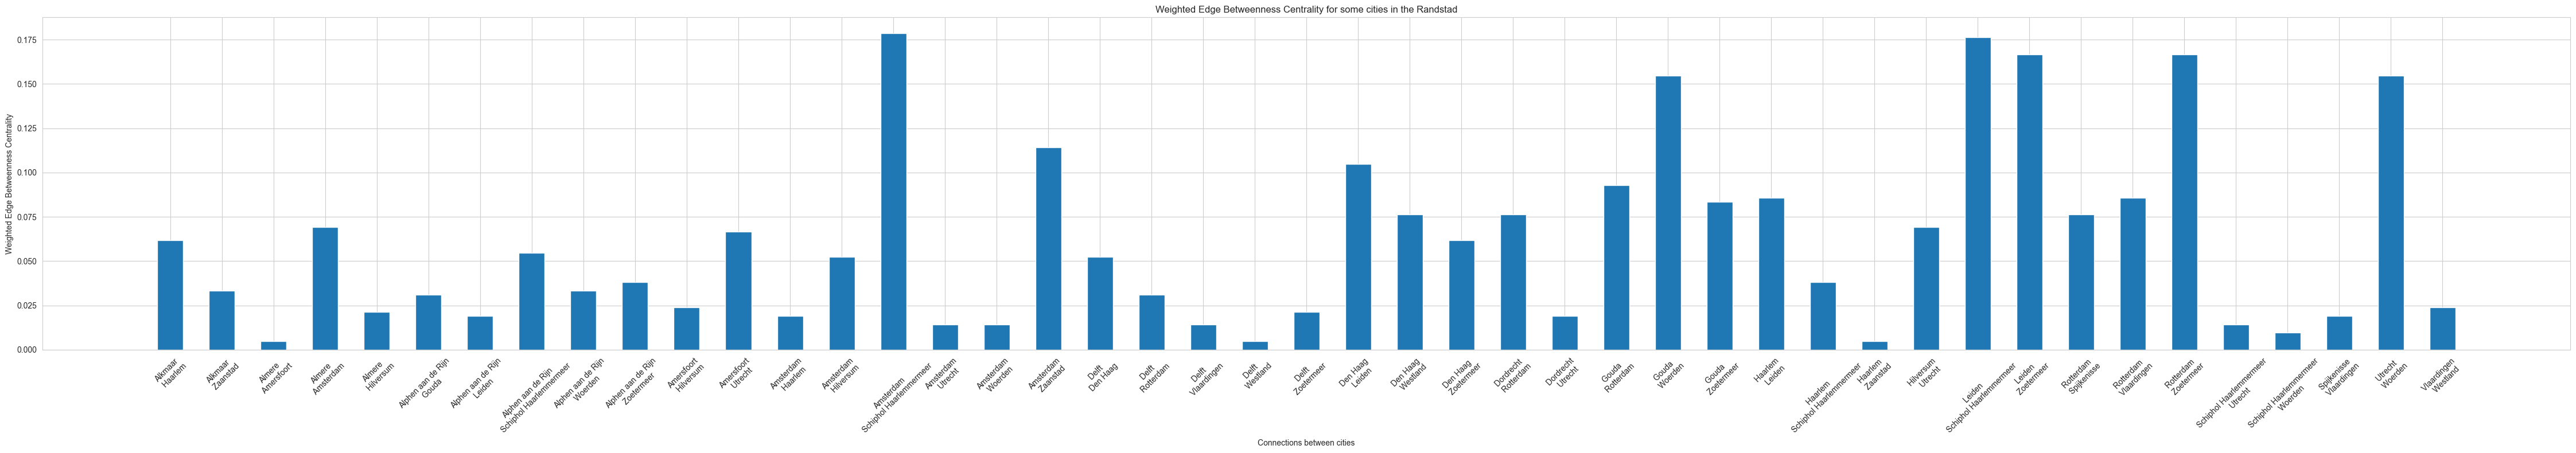

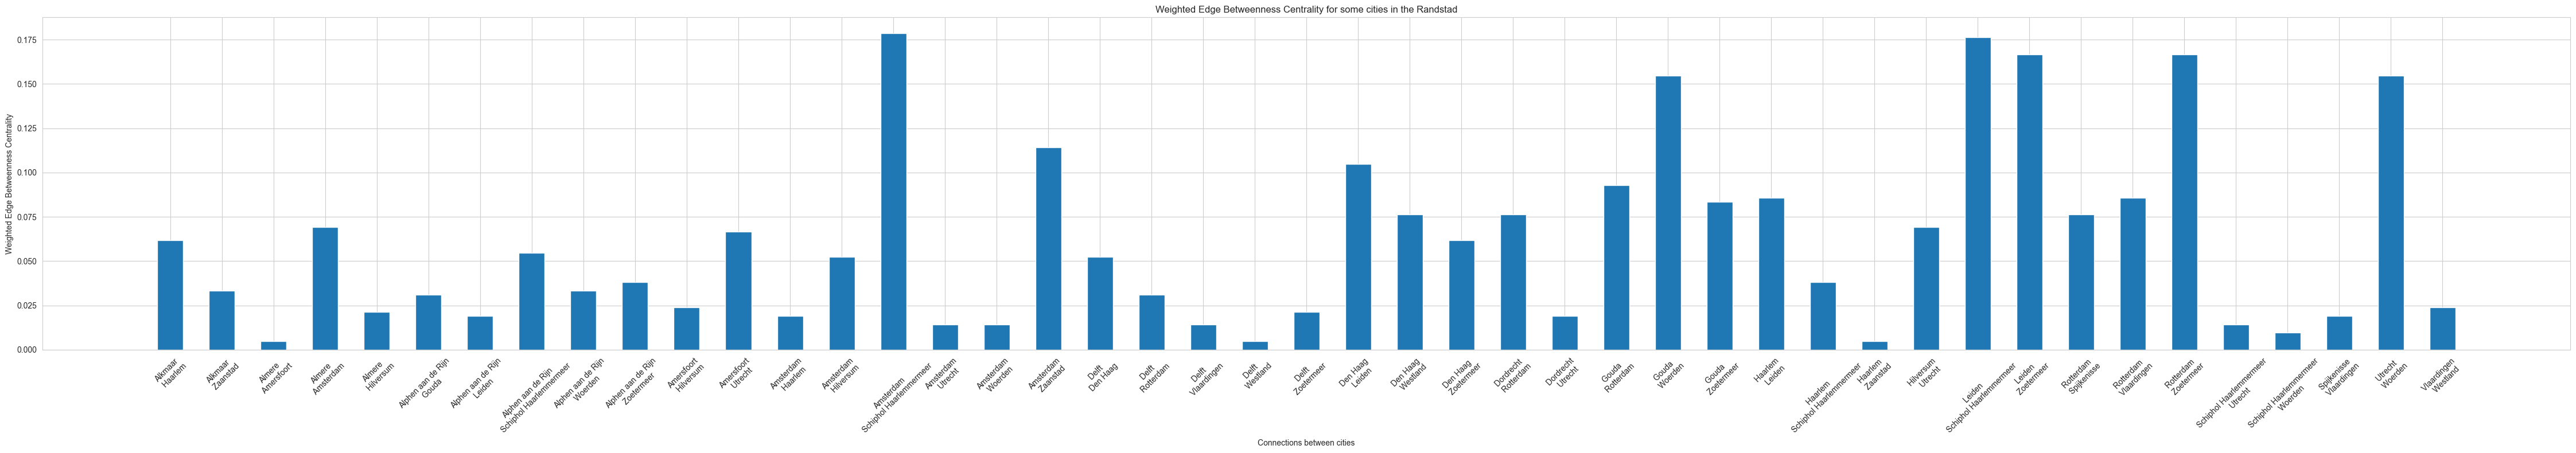

In [78]:
# Helper function for parsing the edge labels
def pp_Edges(l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weigthed_distance)), edge_betweenness_weigthed_distance.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weigthed_distance)), pp_Edges(list(edge_betweenness_weigthed_distance.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weigthed_time)), edge_betweenness_weigthed_time.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weigthed_time)), pp_Edges(list(edge_betweenness_weigthed_time.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_3752\3689597293.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betw_distance.set_xticklabels(G_betw_distance.get_xticklabels(), rotation=90, color='black', ha='center')


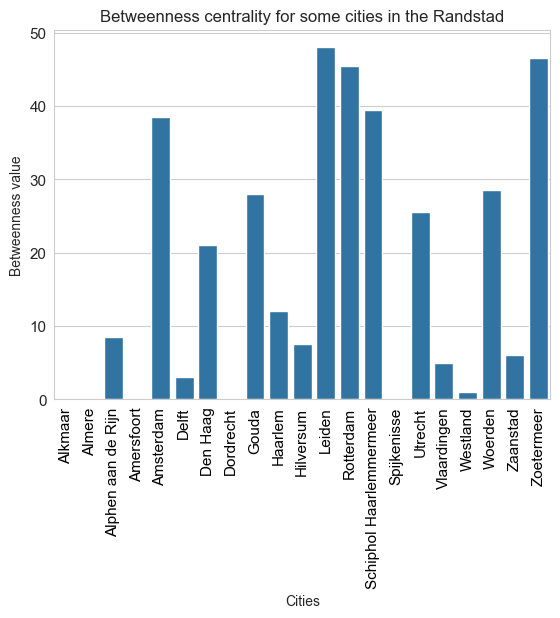

C:\Users\TimEW\AppData\Local\Temp\ipykernel_3752\3689597293.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betw_time.set_xticklabels(G_betw_time.get_xticklabels(), rotation=90, color='black', ha='center')


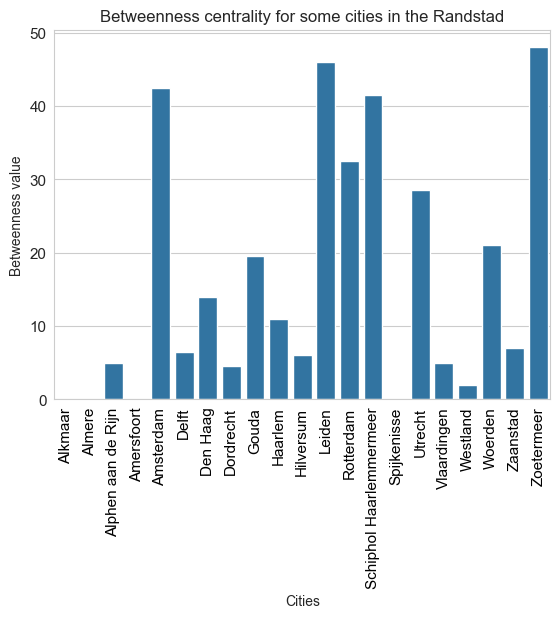

In [79]:
# Betweenness centrality with the time as factor
betweenness_distance = nx.betweenness_centrality(Randstad_Graph,
                                                 k=None,
                                                 normalized=False,
                                                 weight='length',
                                                 seed=None)

# Plot the values in a bar chart
G_betw_distance = sns.barplot(betweenness_distance)
G_betw_distance.set_title("Betweenness centrality for some cities in the Randstad")
G_betw_distance.set_xticklabels(G_betw_distance.get_xticklabels(), rotation=90, color='black', ha='center')
G_betw_distance.tick_params(direction='out', pad=2, labelsize=11)
G_betw_distance.set(xlabel='Cities', ylabel='Betweenness value')
plt.show()

# Betweenness centrality with the time as factor
betweenness_time = nx.betweenness_centrality(Randstad_Graph,
                                             k=None,
                                             normalized=False,
                                             weight='time',
                                             seed=None)

# Plot the values in a bar chart
G_betw_time = sns.barplot(betweenness_time)
G_betw_time.set_title("Betweenness centrality for some cities in the Randstad")
G_betw_time.set_xticklabels(G_betw_time.get_xticklabels(), rotation=90, color='black', ha='center')
G_betw_time.tick_params(direction='out', pad=2, labelsize=11)
G_betw_time.set(xlabel='Cities', ylabel='Betweenness value')
plt.show()

### Now we are going to use two different ways to caclutate the travel times or distances to two offices

With the first couple of methods, all travel times to both respective offices (read destination cities) are calculated and the minimum times with the corresponding offices are selected.

In reality though, people would only consider the travel time or distance to their nearest office. Thus in the methods thereafter, only the travel times from each city to their respective nearest office are taken into account. Furthermore these sophisticated functions also take into account the total amount of employees that is in each city and has to travel to their nearest office. This makes cities with lots of employees weigh more in their travel time or distance calculations to a nearest office.

These times or distances will then be minimised by investigating every possible combination of office/destination cities and picking those with the lowest total travel time or distance form each city in the graph.

In [80]:
# PREVIOUSLY ALREADY DEFINED, BUT REPEATED HERE FOR THE SAKE OF CLARITY
def shortest_path(graph, source=None, target=None, weight=None):
    short_path = nx.shortest_path(graph, source=source, target=target, weight=weight)
    return short_path

# A function to calculate the travel distances to two offices
# This is a rudimentary way of tackling this problem since employees will only want to travel to their closest office
# The weight attribute depends on the use of time or distance.
def simple_travel_amount_car(graph, office_1, office_2, weight):
    # Creates two dicts with all the paths to the offices from every node
    all_paths_1 = shortest_path(graph, target=office_1, weight=weight)
    all_paths_2 = shortest_path(graph, target=office_2, weight=weight)
    total_travel_amount_1 = 0
    total_travel_amount_2 = 0
    
    # For both offices, find the total path length to the target office
    for starting_city in graph.nodes():
        # The shortest paths to both offices
        path_1 = all_paths_1[starting_city]
        path_2 = all_paths_2[starting_city]
        
        # The length of these paths
        total_travel_amount_1 += nx.path_weight(graph, path_1, weight=weight)
        total_travel_amount_2 += nx.path_weight(graph, path_2, weight=weight)
    
    # Give the total travel distances to both offices
    total_amount_all_offices = total_travel_amount_1 + total_travel_amount_2
    
    return total_amount_all_offices, total_travel_amount_1, total_travel_amount_2

print(simple_travel_amount_car(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'length'))
print(simple_travel_amount_car(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'time'))

(1979, 1016, 963)
(1942, 962, 980)


In [81]:
# Now we use the previous function to find the office locations with the minimum travel times
# Do notice that the amount of employees per starting city is not taken into account here.
# The weight attribute depends on the use of time or distance.
def minimise_travel_amount_simple(graph, weight):
    # Set up the minimum travel time of both offices
    minimum_travel_amount = np.inf
    selected_office_1 = ''
    selected_office_2 = ''
    
    # Create a list of all possible office combinations in all cities, the offices need to be in two different cities
    office_list = [i for i in graph.nodes()]
    office_combinations = [(i,j) for i in office_list for j in office_list if i != j]
    
    # Run through these combinations to find the minimum travel time and the corresponding offices
    for combination in office_combinations:
        office_1, office_2 = combination
        # The travel times to both offices are all summed up per combination
        total_amount_all_offices, total_amount_office_1, total_amount_office_2 = simple_travel_amount_car(graph, office_1, office_2, weight)       
        if minimum_travel_amount > total_amount_all_offices: 
            minimum_travel_amount = total_amount_all_offices
            selected_office_1 = office_1
            selected_office_2 = office_2
            
    return selected_office_1,selected_office_2,minimum_travel_amount

print(minimise_travel_amount_simple(Randstad_Graph, 'length'))
print(minimise_travel_amount_simple(Randstad_Graph, 'time'))

('Alphen aan de Rijn', 'Leiden', 1903)
('Alphen aan de Rijn', 'Leiden', 1905)


In [82]:
# To involve the employees, a new dataframe is created which can be more easily manipulated
# (This is literally twenty times faster by using .at in a new dataframe than using .loc and .values conversion)
randstad_employee_table = randstad_network.copy()
randstad_employee_table.set_index('Cities', inplace=True)

# A function where only the travel time to the closest office is taken into consideration
# Furthermore the function takes into account how many employees per starting city have to travel to the closest office
# It thus calculates the total employee travel time or distance to the closest office and sums this up. 
# The weight attribute depends on the use of time or distance.
def travel_amount_car_closest_office(graph, office_1, office_2, weight):
    # Creates two dicts with all the paths to the offices from every node
    all_paths_1 = shortest_path(graph, target=office_1, weight=weight)
    all_paths_2 = shortest_path(graph, target=office_2, weight=weight)
    
    # Find for every starting node the closest office with corresponding travel time or distance and sum these together
    total_employee_amount_office_closest_office = 0
    
    for starting_city in graph.nodes():
        # The quickest paths to both offices
        path_1 = all_paths_1[starting_city]
        path_2 = all_paths_2[starting_city]
        
        # The duration or distance of these paths
        travel_amount_1 = nx.path_weight(graph, path_1, weight=weight)
        travel_amount_2 = nx.path_weight(graph, path_2, weight=weight)
        
        # Only the time or distance of the closest office is used factored by the amount of employees traveling/distance this time
        city_employees = randstad_employee_table.at[starting_city, 'Employees']
        total_employee_amount_office_closest_office += min(travel_amount_1, travel_amount_2) * city_employees
        
    return total_employee_amount_office_closest_office

print(f'The average employee travel distance with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'length'))/5000}')

print(f'The average employee travel time with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'time'))/5000}')

The average employee travel distance with the offices, Schiphol Haarlemmermeer and Zoetermeer: 27.164584824060007
The average employee travel time with the offices, Schiphol Haarlemmermeer and Zoetermeer: 27.8445415353


In [85]:
# Now we use the previous function to find the office locations with the minimum travel amounts to their closest office
# Only the closest office is taken into consideration per starting city. The weight attribute depends on the use of time or distance.
def minimise_travel_amount_closest_office(graph, weight):
    # Set up the minimum travel amount of both offices
    minimum_travel_amount_all_employees = np.inf
    selected_office_1 = ''
    selected_office_2 = ''
    
    # Create a list of all possible office combinations in all cities, the offices need to be in two different cities
    office_list = [i for i in graph.nodes()]
    office_combinations = [(i,j) for i in office_list for j in office_list if i != j]
    
    # Run through these combinations to find the minimum travel time and the corresponding offices
    for combination in office_combinations:
        office_1, office_2 = combination
        # The total travel amounts to the closest offices are calculated per office combination
        total_amount_all_offices = travel_amount_car_closest_office(graph, office_1, office_2, weight)       
        if minimum_travel_amount_all_employees > total_amount_all_offices: 
            minimum_travel_amount_all_employees = total_amount_all_offices
            selected_office_1 = office_1
            selected_office_2 = office_2
            
    return selected_office_1,selected_office_2,minimum_travel_amount_all_employees

selected_office_1,selected_office_2,minimum_travel_distance_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, 'length')
selected_office_1_time,selected_office_2_time,minimum_travel_time_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, 'time')
print(f'The minimised employee travel distance resulted in the offices: {selected_office_1} and {selected_office_2}\nWith and average employee travel distance of : {(minimum_travel_distance_all_employees)/5000} kilometer')
print('\n')
print(f'The minimised employee travel time resulted in the offices: {selected_office_1_time} and {selected_office_2_time}\nWith and average employee travel distance of : {(minimum_travel_time_all_employees)/5000} minutes')

The minimised employee travel distance resulted in the offices: Amsterdam and Rotterdam
With and average employee travel distance of : 20.637938735376004 kilometer


The minimised employee travel time resulted in the offices: Amsterdam and Rotterdam
With and average employee travel distance of : 21.261379102516003 minutes


### Now we start ploting

But first let's make some auxiliary functions

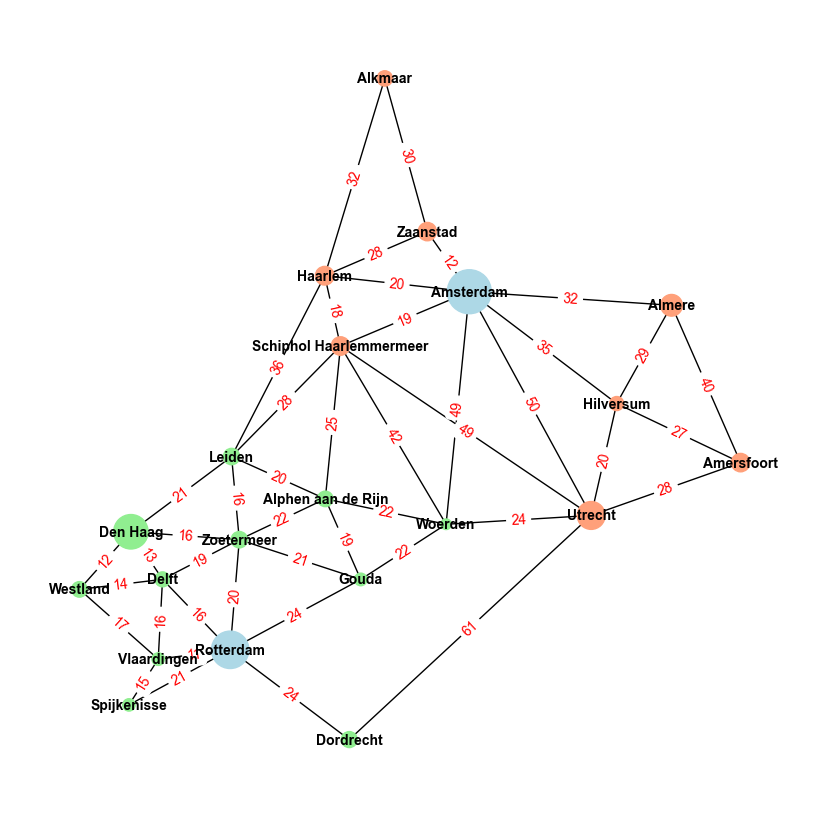

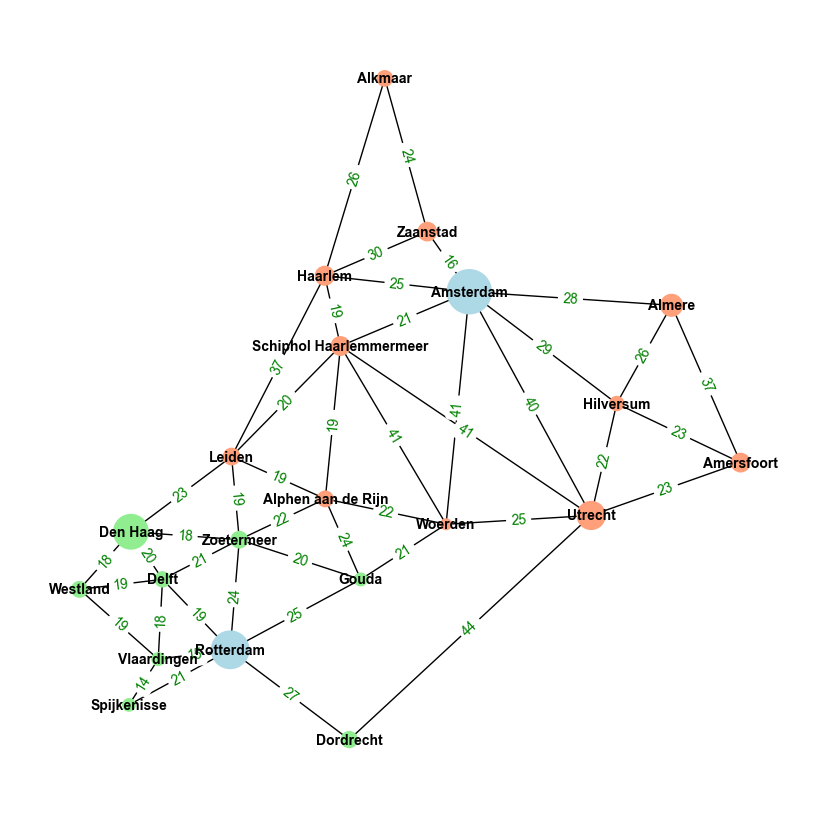

In [86]:
# A function that gives each node/city in the graph a color, one for the selected offices / destination nodes, the other for the closest to office one and the last for the closest to office two. The weight attribute depends on the use of time or distance.
def coloring_nodes_offices(graph, office_1, office_2, weight):
    node_color_list = []
    for i, city in enumerate(graph.nodes()):
        node_color_list.append('lightsalmon')
        if city in [office_1, office_2]:
            node_color_list[i] = 'lightblue'
        else:
            # Paths to both offices
            path_1 = shortest_path(graph, source=city, target=selected_office_1, weight=weight)
            path_2 = shortest_path(graph, source=city, target=selected_office_2, weight=weight)
            
            # The duration of these paths
            travel_amount_1 = nx.path_weight(graph, path_1, weight=weight)
            travel_amount_2 = nx.path_weight(graph, path_2, weight=weight)
            # If office one is closer, the node gets recolored, the other ones (to office 2) keep their color
            if travel_amount_1 > travel_amount_2:
                node_color_list[i] = 'lightgreen'                
    return node_color_list

color_list_distance = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'length')
color_list_time = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'time')

# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color=color_list_distance, 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=distance_dictionary,
                             font_color='red'
                             )
plt.axis('off')
plt.show()


# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color=color_list_time, 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=time_dictionary,
                             font_color='green'
                             )
plt.axis('off')
plt.show()


In [99]:
# To involve the employees, a new dataframe is created which can be more easily manipulated
# (This is literally twenty times faster by using .at in a new dataframe than using .loc and .values conversion)
randstad_employee_table = randstad_network.copy()
randstad_employee_table.set_index('Cities', inplace=True)

def one_office(graph, weight):
    
    total_path_amount = np.inf
    closest_office = ''
    
    for office in graph.nodes():
        
        total_employee_travel_amount = 0
        
        for start_city in graph.nodes():
            city_employees = randstad_employee_table.at[start_city, 'Employees']
            
            short_path = shortest_path(graph, source=start_city, target=office, weight=weight)
            total_employee_travel_amount += nx.path_weight(graph, short_path, weight=weight) * city_employees
            
        if total_path_amount > total_employee_travel_amount:
            total_path_amount = total_employee_travel_amount
            closest_office = office
    
    total_path_amount = total_path_amount/5000
    
    return total_path_amount, closest_office
        
one_office(Randstad_Graph, 'length')

Alkmaar 377656.3206159
Almere 350457.136482
Alphen aan de Rijn 223655.79807627999
Amersfoort 382835.1763098599
Amsterdam 236983.53015260003
Delft 276334.73025336
Den Haag 253073.43638305998
Dordrecht 350213.59857722
Gouda 243604.78027738002
Haarlem 248826.30542182
Hilversum 314968.02605068
Leiden 221529.65979342
Rotterdam 266074.82019818
Schiphol Haarlemmermeer 220142.65839104002
Spijkenisse 359830.19307957997
Utrecht 286970.53448787995
Vlaardingen 307119.78850428003
Westland 293757.57251086
Woerden 251647.56818234
Zaanstad 289141.73089652
Zoetermeer 230279.44343494


(44.028531678208005, 'Schiphol Haarlemmermeer')